In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Lib import *
%matplotlib inline

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(*train_images.shape, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(*test_images.shape, 1)
test_images = test_images / 255.0

type: Ankle boot


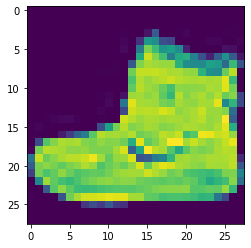

In [4]:
type2name = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
print('type:', transform(train_labels[0], dict=type2name))
# print(train_images[0])
plt.imshow(train_images[0])
# print(train_images.shape[1:])

In [5]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(10, activation=tf.nn.softmax),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [6]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.98:
            self.model.stop_training = True

model.fit(train_images, train_labels, epochs=50, callbacks=[callback()])

Epoch 1/50
1831/1875 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.8103  

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_images, test_labels)

In [ ]:
predictId = 1
print('value:', transform(test_labels[predictId], dict=type2name))
value = model.predict(np.array([train_images[predictId]]))
print(value)
plt.imshow(test_images[predictId])